<a href="https://colab.research.google.com/github/johnny19436/ML-learn/blob/main/ML_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Each pixel intensity is represented as a byte (0 to 255):

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
X_test.shape

(10000, 28, 28)

Split the full training set into a validation set and a (smaller) training set.Also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

You can also use validation_split=0.1

In [7]:
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.

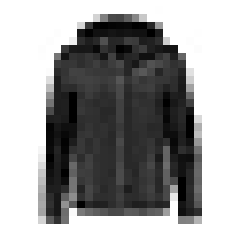

In [8]:
plt.imshow(X_train[0],cmap="binary")
plt.axis('off')
plt.show()

Corresponding class names

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

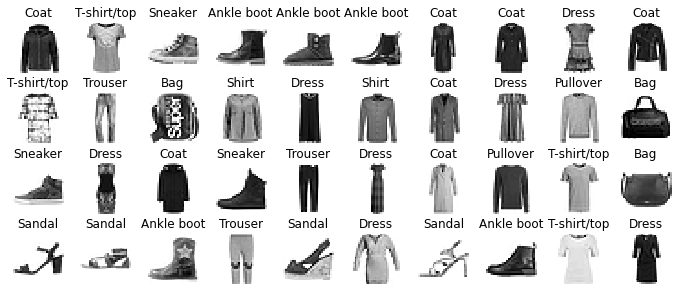

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.4)
plt.show()

P.295
Classification loss to choose

Sparse to One-Hot => keras.utils.categorical()


In [12]:
model = keras.models.Sequential([
    #keras.layers.Reshape((-1,),input_shape=(28,28)),#Flatten inputs to 1D
    keras.layers.Flatten(input_shape=[28, 28]),#reshape(-1,1)=>Flatten inputs to 1D
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.layers

Param = ( input_shape + 1(bias) ) * output_shape

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


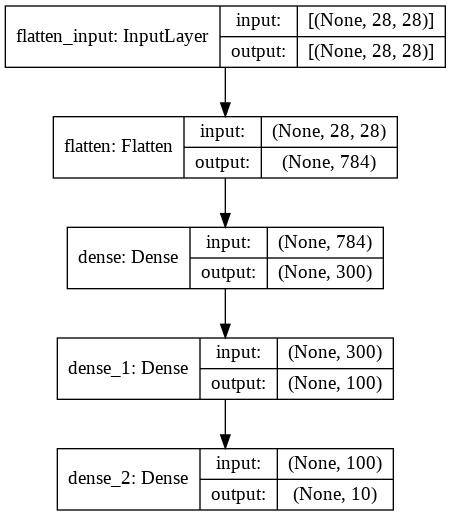

In [15]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [16]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [17]:
weights

array([[ 0.00068235, -0.03483929,  0.03854904, ...,  0.05625911,
         0.04474489,  0.05914953],
       [ 0.02207435,  0.04099225, -0.04402683, ..., -0.01520095,
         0.07418029,  0.00240549],
       [ 0.02429982, -0.01929566, -0.06270497, ..., -0.06898297,
         0.07360044,  0.03715734],
       ...,
       [ 0.05713381,  0.03138337, -0.04717742, ...,  0.00618457,
        -0.02110629, -0.06022828],
       [ 0.01196975, -0.02367768,  0.02302112, ...,  0.0205787 ,
         0.00226115, -0.04794874],
       [-0.0038543 ,  0.02286303,  0.04651026, ...,  0.04858641,
         0.01321628,  0.01050437]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),#Dont use "sgd"
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=30,
            #batch_size=256,
            #validation_split=0.3,
            #class_weight={}
            validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2243 - accuracy: 0.9192 - val_loss: 0.3130 - val_accuracy: 0.8866
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2205 - accuracy: 0.9211 - val_loss: 0.2964 - val_accuracy: 0.8938
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2174 - accuracy: 0.9218 - val_loss: 0.3108 - val_accuracy: 0.8874
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2139 - accuracy: 0.9225 - val_loss: 0.2979 - val_accuracy: 0.8908
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2099 - accuracy: 0.9247 - val_loss: 0.2976 - val_accuracy: 0.8934
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2067 - accuracy: 0.9257 - val_loss: 0.2862 - val_accuracy: 0.8984
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2027 - accuracy: 0.9278 - val_loss: 0.3002 - val_accuracy:

In [22]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

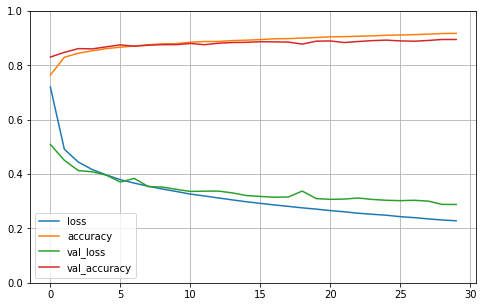

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Adjust model=>
1. learning rate
2. Hyperparameter

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8871


[0.3390234708786011, 0.8870999813079834]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
import numpy as np

y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

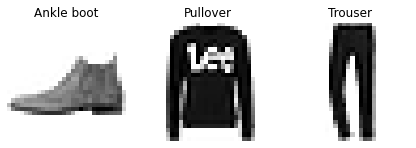

In [34]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()